<a href="https://colab.research.google.com/github/profmatgc/animacoes/blob/main/austrian_cycles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📉 Austrian Cycles: Análise de Recessões

> *"O gatilho dos ciclos de expansão e queda são as políticas monetárias dos bancos centrais."* — **Frank Shostak**

---

### 🎯 Objetivo

#### Avaliar se a **Verdadeira Oferta Monetária (`TMS2_YoY`)** atua como um indicador antecedente confiável para prever recessões econômicas, comparando-a com a tradicional **Curva de Juros (`T10Y3M`)**.

---



### **O que é recessão econômica?**

#### Segundo Frank Shostak -- Ph.D em Economia, estrategista de mercado da MF Global Australia (anteriormente Ord Minnett) e pesquisador associado do Mises Institute -- **recessão econômica** é a liquidação de várias atividades não produtivas que surgiram devido às políticas monetárias frouxas do banco central.

#### Ao tratar dos ciclos econômicos e, consequentemente, das recessões, Shostak sintetiza:
> Sempre que o banco central relaxa sua postura monetária, ele desencadeia um boom econômico por meio do desvio de riqueza dos geradores-de-riqueza para diversas atividades que um livre mercado não facilitaria. Então, sempre que ele aperta sua postura monetária, isso desacelera ou põe fim ao desvio de riqueza para essas atividades; isso por sua vez mina a existência deles. Portanto, o gatilho dos ciclos de expansão e queda são as políticas monetárias dos bancos centrais.

#### Assim, após toda uma discussão com relação ao *National Bureau of Economic Research* (NBER), Shostak afirma que apenas acompanhando a taxa de crescimento da oferta monetária é possível ter uma ideia dos ciclos de boom e queda.

[Artigo 1](https://mises.org/mises-wire/why-recessions-are-not-about-declining-gdp)

[Artigo 2](https://mises.org/mises-wire/nber-framework-asses-business-cycles-describes-does-not-explain-them)

### **Como avaliar a oferta monetária?**

#### Consideraremos o **TMS2**, uma medida estatística da oferta monetária baseada na formulação *True Money Supply* (TMS) de Rothbard e Salerno. Ela condiz com a definição de dinheiro como meio geral de troca na sociedade. Outrossim, para que algo seja "dinheiro", ele deve ser aquilo que extingue completamente a dívida contraída em uma transação.

#### Com base no artigo de Salerno -- *The “True” Money Supply: A Measure of the Supply of the Medium of Exchange in the U.S. Economy* -- tomamos as seguintes variáveis para a fórmula do TMS:


$TMS =$
$CURRNS + DEMDEPNS + MDLNM + FGSBLUQ027S + WTREGEN + BOGZ1FL763123005Q + WDFOL$

#### **Obs:** Variáveis como Eurodólares foram descartadas por rigor teórico, enquanto outras, como Depósitos de Estrangeiros em Bancos Comerciais, não foram computadas devido à descontinuidade das séries de dados e demais limitações do FED.

[Artigo 3](https://mises.org/austrian-economics-newsletter/true-money-supply-measure-supply-medium-exchange-us-economy-0#footnote25_wrRYRm9luGpO3JDzkUT4SbK5aH3SuBdJuNZrscdagg4_nCTUcSWD3aFL)

[Artigo 4](https://mises.org/mises-daily/money-supply-metrics-austrian-take)

In [19]:
# Instalação do fredapi
!pip install fredapi

In [20]:
# Inserindo uma api_key
# disponível em https://fred.stlouisfed.org/docs/api/api_key.html
from fredapi import Fred
fred = Fred(api_key='SUA_CHAVE')

In [21]:
# Demais bibliotecas
import pandas as pd
pd.options.display.max_colwidth = 60

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
figsize(20, 5)

In [22]:
# Criando uma tabela das variáveis
df = {}
lista = ['CURRNS', 'DEMDEPNS', 'MDLNM', 'FGSBLUQ027S', 'WTREGEN', 'BOGZ1FL763123005Q', 'WDFOL']

for i in lista:
  df[i] = fred.get_series(i)

df = pd.DataFrame(df).ffill().dropna()

In [23]:
# Lista das variáveis em milhões de dólares (demais em bilhões)
cols_em_milhoes = ['FGSBLUQ027S', 'WTREGEN', 'BOGZ1FL763123005Q', 'WDFOL']

In [24]:
# Convertendo-as para bilhões de dólares
df[cols_em_milhoes] = df[cols_em_milhoes] / 1000

In [25]:
# Tabela final
df['TMS2'] = df.sum(axis=1)
df

,CURRNS,DEMDEPNS,MDLNM,FGSBLUQ027S,WTREGEN,BOGZ1FL763123005Q,WDFOL,TMS2
2020-05-01,1824.3,2128.9,12213.0,149.721,997.507,1.904,16.323,17331.655
2020-05-06,1824.3,2128.9,12213.0,149.721,1127.490,1.904,16.336,17461.651
2020-05-13,1824.3,2128.9,12213.0,149.721,1177.494,1.904,16.328,17511.647
2020-05-20,1824.3,2128.9,12213.0,149.721,1194.410,1.904,16.228,17528.463
2020-05-27,1824.3,2128.9,12213.0,149.721,1310.491,1.904,16.251,17644.567
...,...,...,...,...,...,...,...,...
2025-12-03,2335.9,6204.4,10500.3,152.648,937.167,5.552,9.437,20145.404
2025-12-10,2335.9,6204.4,10500.3,152.648,858.946,5.552,9.436,20067.182
2025-12-17,2335.9,6204.4,10500.3,152.648,833.093,5.552,9.436,20041.329
2025-12-24,2335.9,6204.4,10500.3,152.648,837.120,5.552,9.439,20045.359


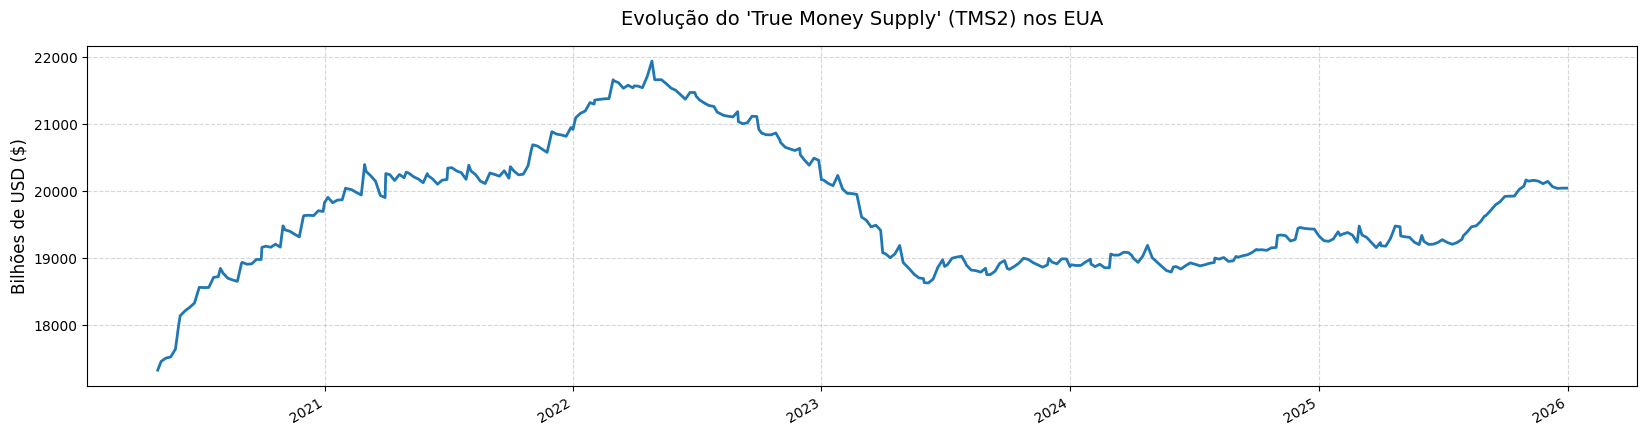

In [37]:
# Série temporal do TMS2
df['TMS2'].plot(color='#1f77b4', linewidth=2)

plt.title("Evolução do 'True Money Supply' (TMS2) nos EUA", fontsize=14, pad=15)
plt.ylabel("Bilhões de USD ($)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [27]:
# Criando a variação percentual de 52 semanas (aprox. 1 ano)
df['TMS2_YoY'] = df['TMS2'].pct_change(52) * 100

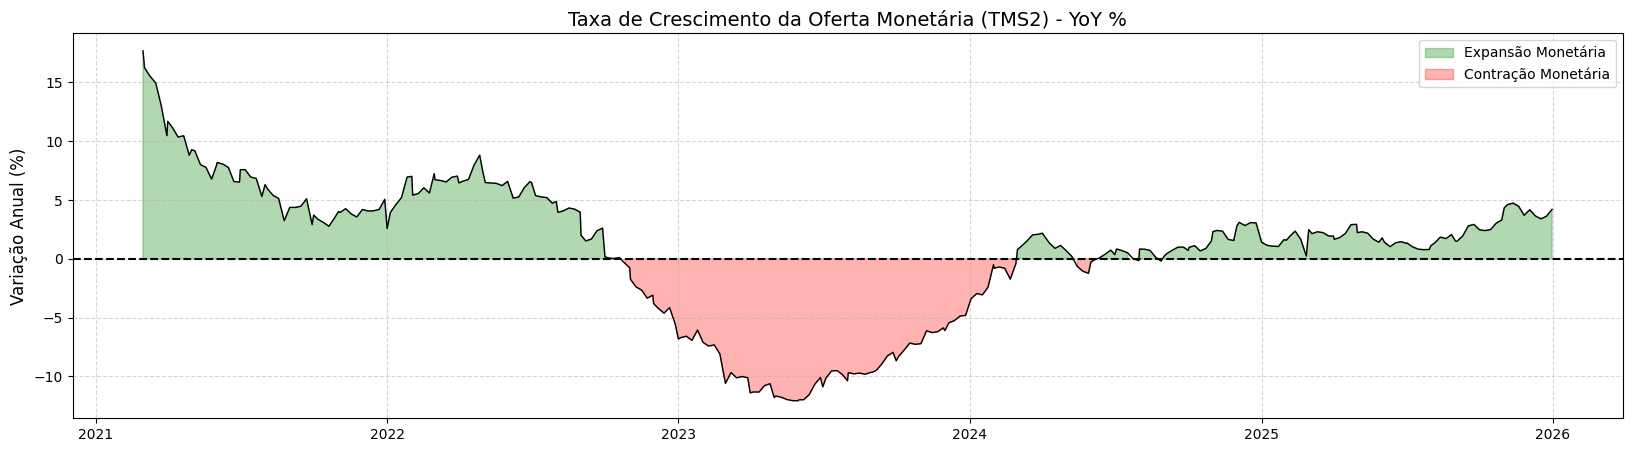

In [28]:
# Série temporal da taxa de crescimento do TMS2 - YoY %
plt.fill_between(
    df.index,
    df['TMS2_YoY'],
    0,
    where=(df['TMS2_YoY'] >= 0),
    color='green',
    alpha=0.3,
    label='Expansão Monetária'
)

plt.fill_between(
    df.index,
    df['TMS2_YoY'],
    0,
    where=(df['TMS2_YoY'] < 0),
    color='red',
    alpha=0.3,
    label='Contração Monetária'
)

plt.plot(df.index, df['TMS2_YoY'], color='black', linewidth=1)
plt.axhline(0, color='black', linestyle='--')

plt.title("Taxa de Crescimento da Oferta Monetária (TMS2) - YoY %", fontsize=14)
plt.ylabel("Variação Anual (%)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

In [29]:
# Inflação real na ótica austríaca
print('A inflação real é de aprox.: {}'.format(round(df['TMS2_YoY'].iloc[-1], 2)) + '% a.a.')

A inflação real é de aprox.: 4.2% a.a.


### **E existem mais indicadores que antecipam uma recessão?**

#### Conforme Robert Murphy -- Ph.D em Economia, professor no Free Market Institute da Texas Tech University e pesquisador sênior do Mises Institute -- temos que:

> As mudanças nas taxas de crescimento do agregado monetário austríaco da "verdadeira oferta monetária" (TMS) correspondem muito bem à diferença na curva de juros... quando o sistema bancário se contrai e o crescimento da oferta monetária desacelera, então a curva de juros se achata ou até inverte. Não é surpreendente que, quando os bancos "pisam os freios" com a criação de dinheiro, a economia logo entre em recessão.

#### Desse modo, desaceleração monetária, inversão da curva de juros e recessão andam juntas. Aqui, a inversão de que estamos falando é a diferença entre os títulos do tesouro de 10 anos e de 3 meses (`T10Y3M`).

#### Para esclarecer sobre a grande importância desse índice, Murphy escreve:

> Investidores e analistas financeiros têm muito interesse nesse fenômeno, porque uma curva de juros invertida (definida de uma forma específica) tem sido um indicador perfeito de recessões que remontam a pelo menos cinquenta anos. Se olharmos para as últimas oito recessões, começando pela que começou em dezembro de 1969, uma inversão adequada da curva de juros precedeu todas elas cerca de um ano antes.

#### Posto isso, a ideia central desse projeto será avaliar o `TMS2_YoY` como um indicador preditor do `T10Y3M`.

[Artigo 5](https://mises.org/mises-wire/why-yield-curve-just-inverted-signaling-coming-recession)

[Artigo 6](https://mises.org/understanding-money-mechanics/inverted-yield-curve-and-recession)

In [30]:
# Nova tabela com T10Y3M
df2 = df.copy()
df2['T10Y3M'] = fred.get_series('T10Y3M')
df2 = df2.dropna()
df2

,CURRNS,DEMDEPNS,MDLNM,FGSBLUQ027S,WTREGEN,BOGZ1FL763123005Q,WDFOL,TMS2,TMS2_YoY,T10Y3M
2021-03-01,2020.1,3770.7,12905.9,145.694,1529.977,2.435,22.393,20397.199,17.687543,1.40
2021-03-03,2020.1,3770.7,12905.9,145.694,1429.549,2.435,21.873,20296.251,16.233287,1.42
2021-03-10,2020.1,3770.7,12905.9,145.694,1360.064,2.435,23.474,20228.367,15.513789,1.49
2021-03-17,2020.1,3770.7,12905.9,145.694,1272.583,2.435,30.202,20147.614,14.942274,1.61
2021-03-24,2020.1,3770.7,12905.9,145.694,1061.138,2.435,30.598,19936.565,12.989823,1.60
...,...,...,...,...,...,...,...,...,...,...
2025-12-03,2335.9,6204.4,10500.3,152.648,937.167,5.552,9.437,20145.404,4.165131,0.34
2025-12-10,2335.9,6204.4,10500.3,152.648,858.946,5.552,9.436,20067.182,3.646038,0.44
2025-12-17,2335.9,6204.4,10500.3,152.648,833.093,5.552,9.436,20041.329,3.392301,0.52
2025-12-24,2335.9,6204.4,10500.3,152.648,837.120,5.552,9.439,20045.359,3.616436,0.46


In [31]:
# Mais uma biblioteca
import seaborn as sns

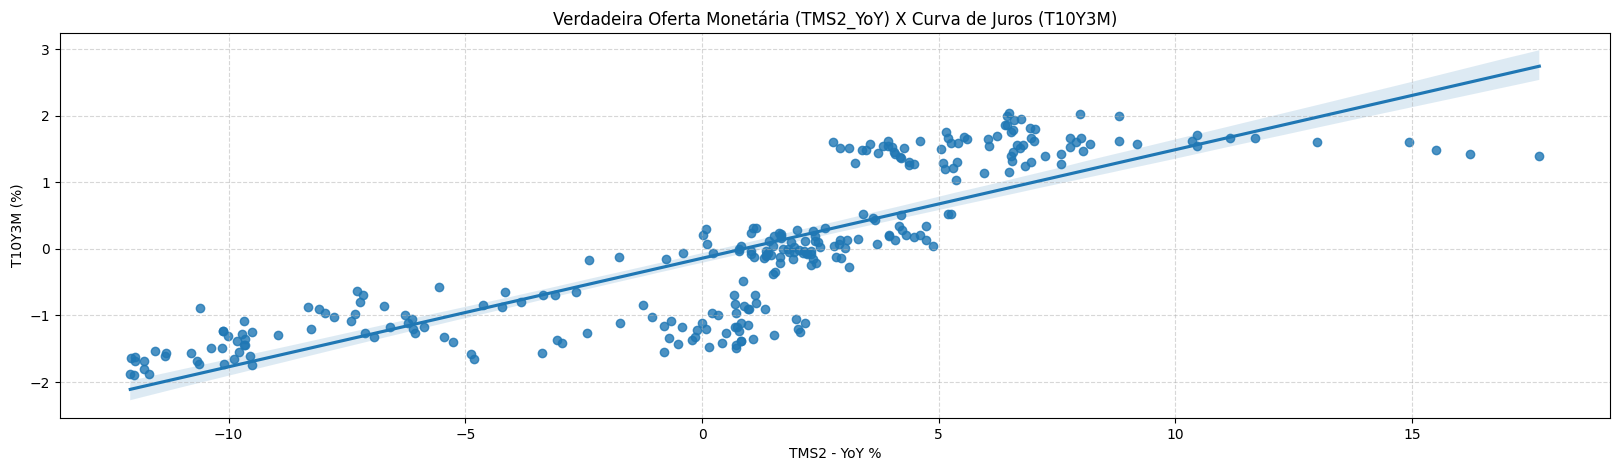

In [38]:
# Regressão linear entre TMS2_YoY e T10Y3M
sns.regplot(x='TMS2_YoY', y='T10Y3M', data=df2)
plt.title('Verdadeira Oferta Monetária (TMS2_YoY) X Curva de Juros (T10Y3M)')
plt.xlabel('TMS2 - YoY %')
plt.ylabel('T10Y3M (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [33]:
# Correlação entre TMS2_YoY e T10Y3M
correlacao = df2['TMS2_YoY'].corr(df2['T10Y3M'])
print(f"A correlação de Pearson é: {correlacao.round(2)}")

A correlação de Pearson é: 0.83


In [34]:
# Testando defasagens de 0 a 52 semanas (1 ano)
lags = range(0, 53)
correlacoes = []

for lag in lags:
    corr = df2['TMS2_YoY'].corr(df2['T10Y3M'].shift(-lag))
    correlacoes.append(corr)

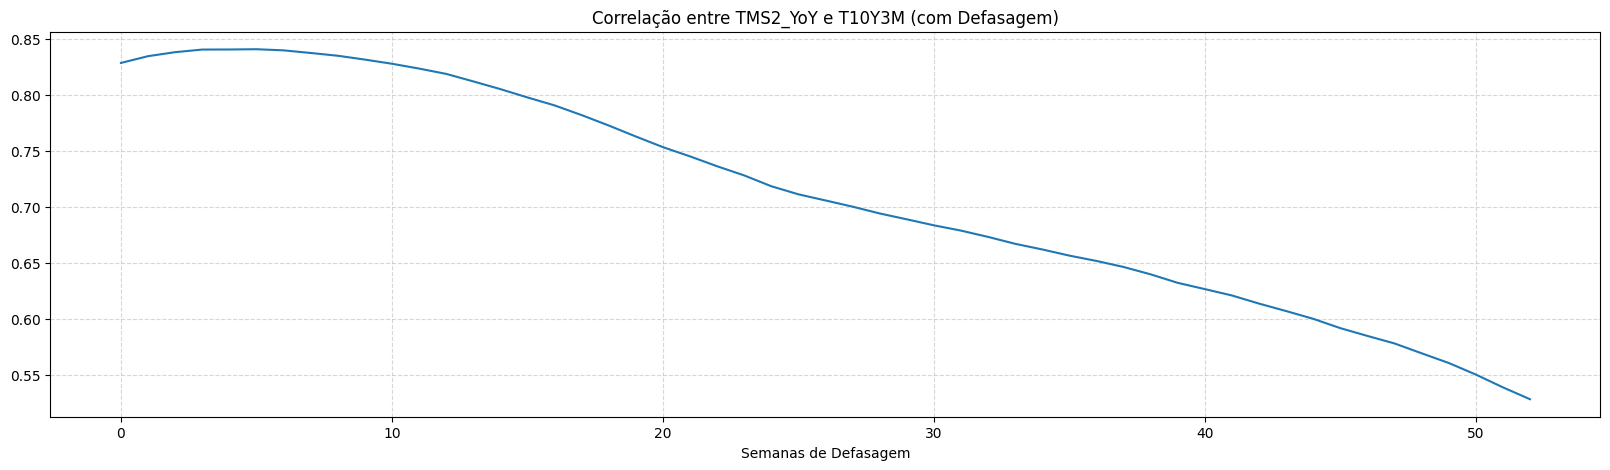

In [35]:
# Visualizando a tendência
plt.plot(lags, correlacoes)
plt.title('Correlação entre TMS2_YoY e T10Y3M (com Defasagem)')
plt.xlabel('Semanas de Defasagem')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [36]:
# Encontrando o lag com a maior correlação
melhor_lag = lags[correlacoes.index(max(correlacoes))]
print(f"A correlação mais forte ocorre com {melhor_lag} semanas de defasagem.")

A correlação mais forte ocorre com 5 semanas de defasagem.


---

### 📊 Principais Resultados

#### A análise estatística revelou uma conexão robusta entre a liquidez do sistema e os movimentos da curva de juros:

| Métrica | Resultado | Interpretação |
| :--- | :--- | :--- |
| **Correlação de Pearson** | **0.83** | **Forte Correlação Positiva.** As variáveis movem-se quase em uníssono. |
| **Defasagem (Lag) Ideal** | **5 Semanas** | O `TMS2_YoY` antecipa os movimentos da Curva de Juros em pouco mais de um mês. |

---

### 💡 Conclusão Final

#### Os dados validam a hipótese da **Escola Austríaca de Economia**:

1.  **Causalidade:** a recessão não é um evento exógeno; ela é precedida por alterações na oferta monetária.
2.  **Poder Preditivo:** o **`TMS2_YoY`** mostrou-se um indicador **antecedente** (*leading indicator*). Ele sinaliza mudanças de liquidez *antes* que o mercado de títulos (*bonds*) reaja e inverta a curva de juros.
3.  **Aplicação:** monitorar o **`TMS2_YoY`** oferece uma vantagem temporal para investidores se protegerem contra os ciclos de "*boom & bust*" induzidos por políticas de bancos centrais.
4. **Inflação Real**: por fim, ainda obtemos um indicador que reflete a inflação real, o próprio `TMS2_YoY`.

---
#### *Projeto desenvolvido em Python | Fonte de dados: FRED (Federal Reserve Economic Data)*